# Ch6-5. Pie chart

## matplotlib을 이용한 파이차트 그리기

`pyplot.pie` 함수를 이용하여 파이차트를 그릴 수 있다.

> x : 각 pie의 크기  
labels : 각 pie에 부착되는 라벨  
labeldistance : 라벨 간 거리(파이 안에 나타나길 원하면 보통 0.3~0.4 정도가 적절)  
normalize : 비율을 나타낼 것인지 여부  
autopct : 위에 표시될 숫자 형태 (예: `"%1.1f%%"`, `"%1d%%"`)  
colors : 배열로 지정하여 파이의 각 파트 색상을 순서대로 설정 가능  

## Pandas 객체의 method를 이용한 파이차트 그리기
`DataFrame.plot()` 함수를 사용하면 DataFrame을 사용한 그래프를 손쉽게 그릴 수 있다.  

> kind : 그래프 종류 ('pie' 파이차트 그림)  
x : 각 pie의 크기
y : 각 pie에 부탁되는 라벨

# Pie chart 그리기

## 경로 설정

In [1]:
import pandas as pd
import os
os.chdir(r"/Users/Angela/Desktop/과속대학쿠쿠루/1. 데이터 핸들링/데이터")

In [2]:
df = pd.read_csv("판매실적통합본.csv", encoding = "cp949")
df.head()

,년도(year),월(month),분기(4),일자(day),주차별 편중도,출하일,대리점,지역 구분,내수/수출 구분,제품군,수량
0,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,12
1,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,4
2,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,1
3,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 5,122
4,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,20


## groupby로 원하는 것 구하기

In [4]:
# 제품군별 수량합계 계산
grouped_df1 = df.groupby(['제품군'], as_index = False)['수량'].sum()
grouped_df1

,제품군,수량
0,제품 1,2690307
1,제품 2,4223384
2,제품 3,531946
3,제품 4,277193
4,제품 5,126323
5,제품 6,262774


In [5]:
grouped_df1.sort_values(by = '수량')['수량']

4     126323
5     262774
3     277193
2     531946
0    2690307
1    4223384
Name: 수량, dtype: int64

현재 데이터 행 별로 스케일이 크게 차이가 난다. 그래서 기타 행을 추가하도록 하려고 한다.  
몇 퍼센트 이하는 기타로 취급하도록 정해져있기도 하다.  

기타 행 추가를, 강사님은 직접적으로 모양을 같게 바로 나오도록 하게 하였다.  
하나의 행을 데이터프레임으로 만들어서 concat으로 이어붙이도록 하려고 한다. 



In [6]:
# 데이터를 확인한 후 6개 행중 2개 행을 제외한 나머지가 전부 따로 표시되도록 한다.
other_row = pd.DataFrame({'제품군':['기타'],
                        '수량':[grouped_df1.sort_values(by = '수량')['수량'].iloc[:4].sum()]})
other_row

,제품군,수량
0,기타,1198236


In [9]:
# 기타행을 원래 데이터와 병합한 후 내림차순 정렬
grouped_df2 = pd.concat([grouped_df1, other_row], axis = 0, ignore_index = True)
grouped_df2.sort_values(by = '수량', ascending = False)

,제품군,수량
1,제품 2,4223384
0,제품 1,2690307
6,기타,1198236
2,제품 3,531946
3,제품 4,277193
5,제품 6,262774
4,제품 5,126323


In [10]:
# 기타행에 포함된 나머지 행들(제품군 4개)을 삭제
grouped_df2 = grouped_df2.sort_values(by = '수량', ascending = False).iloc[:3]
grouped_df2

,제품군,수량
1,제품 2,4223384
0,제품 1,2690307
6,기타,1198236


## pyplot을 이용한 그래프 그리기

In [11]:
# 그래프 기본 설정
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (4, 4)

([<matplotlib.patches.Wedge at 0x7f9d1b26ed60>,
 [Text(-0.025917341908690408, 0.3991594811455542, '제품 2'),
  Text(-0.15547802001060262, -0.36854658497072346, '제품 1'),
  Text(0.35769822495847803, -0.17903066737727943, '기타')],
 [Text(-0.03887601286303561, 0.5987392217183313, '52.1%'),
  Text(-0.23321703001590388, -0.5528198774560851, '33.2%'),
  Text(0.536547337437717, -0.26854600106591914, '14.8%')])

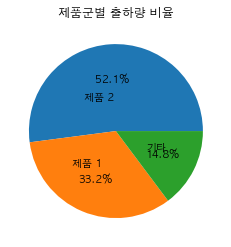

In [16]:
# 제품군별 출하량 합계 계산하기

plt.title('제품군별 출하량 비율')

plt.pie(x = grouped_df2['수량'],      # 파이차트 값
       labels = grouped_df2['제품군'],  # 각 파이 라벨  
       labeldistance = 0.4, # 라벨 위치 
       autopct = '%1.1f%%') # 소수점 첫째자리까지

# Ch6-6. Box plot

boxplot은 하나의 변수에 대한 분포를 한 눈에 보여주는 그래프이다.  
여러 컬럼들, 여러 변수간의 중위수나 박스 크기들을 비교하면서 유의한 차이가 있는지 검정을 하기 위해 선행작업으로 하는 것이다.  

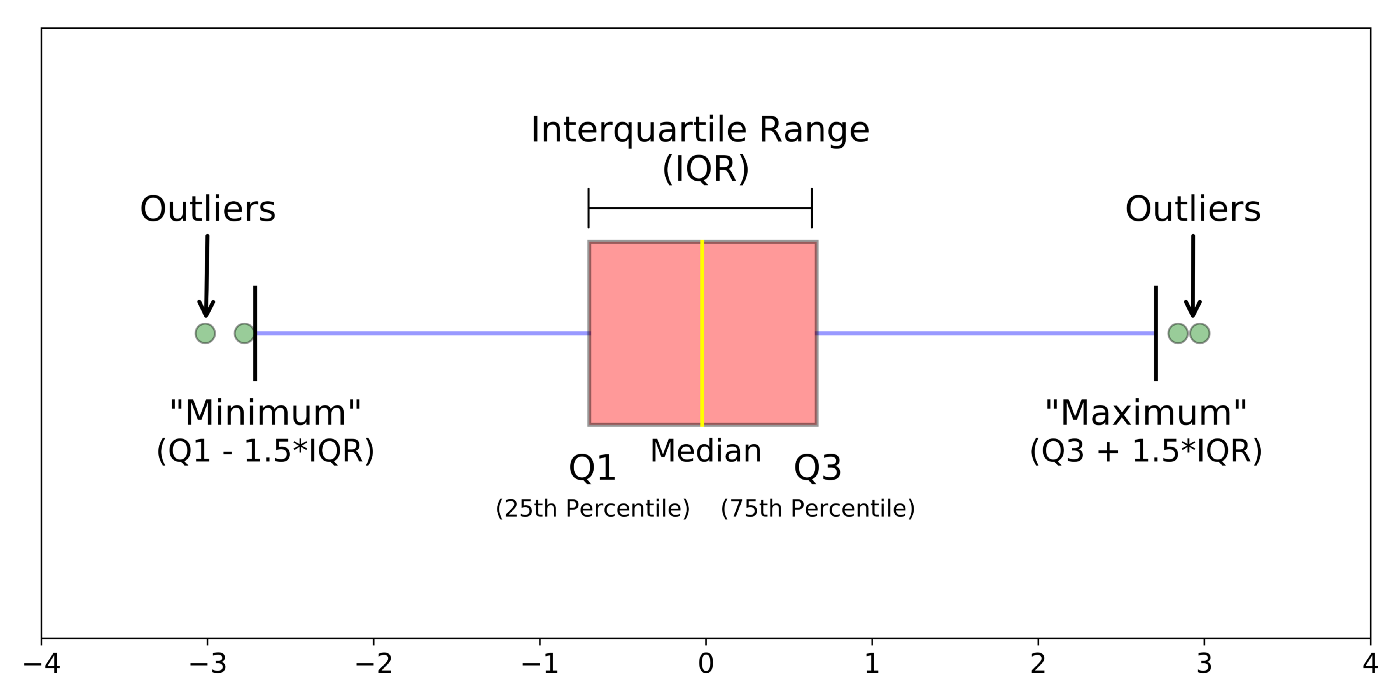  
*출처 : https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51*

최소값과 최대값의 경우, 엄밀하게 말해 **'이상치를 제외한'** 최소값과 최대값을 의미한다.  
데이터포인트 중 가장 크거나 작은 값과는 다르다.  


## matplotlib을 이용한 박스플롯 그리기
`pyplot.box` 함수를 이용하여 산점도를 그릴 수 있다. 데이터프레임으로 하는것보다 조금 더 까다롭다.  

> x : boxplot을 그리기 위한 데이터. 하나의 열(리스트, ndarray)이 하나의 박스 플롯으로 나타난다. (2차원인 경우, 여러 개의 박스 플롯이 그려짐)

## Pandas 객체의 method를 이용한 박스플롯 그리기
`DataFrame.plot()` 함수를 사용하면 DataFrame을 사용한 그래프를 손쉽게 그릴 수 있으며, 산점도 역시 그릴 수 있다.

> column : boxplot을 그릴 컬럼 목록

# Boxplot 그리기

## 경로 설정

In [17]:
df = pd.read_csv("온라인_판매기록.csv", encoding = "cp949")
df.head()

,쇼핑몰,제품,수량,판매금액,쇼핑몰 유형
0,쿠팡,제품_16,8,1134400,쿠팡
1,쿠팡,제품_57,8,439200,쿠팡
2,쿠팡,제품_25,4,495200,쿠팡
3,쿠팡,제품_18,4,578000,쿠팡
4,쿠팡,제품_90,2,75000,쿠팡


## 그래프 설정

In [30]:
# 그래프 기본 설정
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (8, 4)

## 구하고자하는 데이터 준비하기

쇼핑몰 유형별로 판매금액을 박스플롯으로 나타내고자 한다.  

In [25]:
sales_bymall = df.groupby(['쇼핑몰 유형'])['판매금액'].sum()
sales_bymall

쇼핑몰 유형
동물병원      494314700
온라인II     333008500
온라인사이트    468388400
유통대리점     451061700
전시회       130116300
쿠팡        552212500
할인점       130284500
할인점II      50686800
Name: 판매금액, dtype: int64

.apply(list)로 리스트로 받는다. 

In [26]:
# 쇼핑몰 유형에 따른 판매금액을 리스트로 받는다
X = df.groupby(['쇼핑몰 유형'])['판매금액'].apply(list)
X

쇼핑몰 유형
동물병원      [338400, 202600, 238800, 1088000, 135800, 8768...
온라인II     [400800, 586600, 291900, 654000, 684000, 40400...
온라인사이트    [10400, 631400, 516400, 318000, 300000, 306600...
유통대리점     [220200, 10100, 112500, 56000, 236600, 928900,...
전시회       [498000, 195300, 143500, 478200, 358400, 10731...
쿠팡        [1134400, 439200, 495200, 578000, 75000, 19550...
할인점       [39100, 670400, 1533000, 438400, 403200, 19250...
할인점II     [119100, 101300, 124200, 101400, 291900, 37350...
Name: 판매금액, dtype: object

## pyplot을 이용한 박스플롯 그리기

([<matplotlib.axis.XTick at 0x7f9d1d1e6310>,
 [Text(1, 0, '동물병원'),
  Text(2, 0, '온라인II'),
  Text(3, 0, '온라인사이트'),
  Text(4, 0, '유통대리점'),
  Text(5, 0, '전시회'),
  Text(6, 0, '쿠팡'),
  Text(7, 0, '할인점'),
  Text(8, 0, '할인점II')])

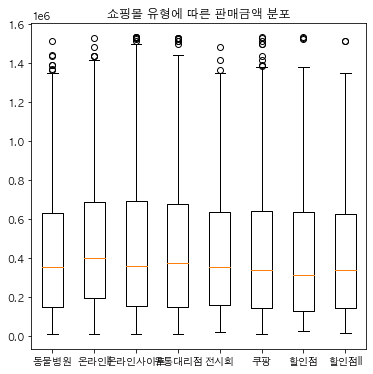

In [27]:
plt.title('쇼핑몰 유형에 따른 판매금액 분포')
plt.boxplot(X.values) # x= X.values
plt.xticks(np.arange(1, len(X)+1), X.index)

## DataFrame을 이용한 박스플롯 그리기

임의의 데이터프레임을 만들어서 해보도록 한다.  


In [35]:
df = pd.DataFrame ({'test1' : np.random.normal(10, 2, size = 1000),
                   'test2' : np.random.normal(9, 6, size = 1000),
                   'test3' : np.random.normal(8, 4, size = 1000)})
df.head(3)

,test1,test2,test3
0,12.728783,7.963609,9.011846
1,7.570531,8.063934,10.929980
2,12.355394,9.995188,15.373892


<AxesSubplot:>

/Users/Angela/opt/anaconda3/envs/py3_8_5/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


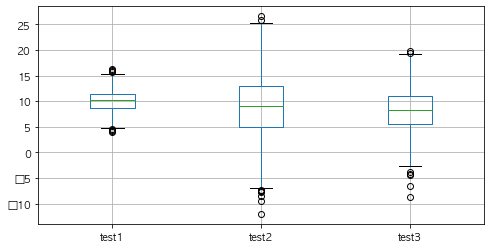

In [36]:
df.boxplot(column = ['test1', 'test2', 'test3'])